# Googleplaystore Analysis Project

In [1]:
# Import libraries and warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style('darkgrid')

In [2]:
playstore=pd.read_csv('googleplaystore.csv')#Stores Dataset in playstore

In [3]:
playstore 
#prints our dataframe to analyse the data.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [4]:
playstore.columns
#Attributes in the dataset

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
playstore.info()
#information of the datatype of the attributes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
playstore.nunique()
#number of unique values in each column

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [7]:
playstore.isnull().sum()
#checks the null values in the dataset

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

we have very few null values except the rating column which has 1474 null values. But let's not drop the null values let's discover and according to the situation we drop the null or any other column if required.

In [8]:
#shape of the dataset
rows = playstore.shape[0]
columns = playstore.shape[1]

In [9]:
print('There are {} Rows and {} Columns in the dataset'.format(rows, columns))

There are 10841 Rows and 13 Columns in the dataset


In [10]:
mode=playstore['Rating'].mode()

In [11]:
mode[0]

4.4

### Prints information like data type,null count and unique all in one go

In [12]:
def printinfo():
    temp = pd.DataFrame(index=playstore.columns)
    temp['data_type'] = playstore.dtypes
    temp['null_count'] = playstore.isnull().sum()
    temp['unique_count'] = playstore.nunique()
    return temp

In [13]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,1474,40
Reviews,object,0,6002
Size,object,0,462
Installs,object,0,22
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


Reviews,Size,Installs,Price these columns are of object datatype but needs to convert into numeric columns or datatypes with some modifications required to do that.

### finding null values in the Rating column to fill it later

In [14]:
playstore[playstore.Rating.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


### Type Column has only 1 null values and let's see how we can fill it or had to remove this row.

In [15]:
playstore[playstore.Type.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [16]:
playstore['Type'].fillna("Free", inplace = True)

In [17]:
playstore.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [18]:
playstore['Type'].value_counts()

Free    10040
Paid      800
0           1
Name: Type, dtype: int64

In [19]:
playstore[playstore['Type']=='0']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


### operations on Content rating column 

In [20]:
playstore.rename(columns={'Content Rating':'Content_Rating'},inplace=True)

In [21]:
playstore[playstore.Content_Rating.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [22]:
playstore.loc[10469:10475, :]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
10469,TownWiFi | Wi-Fi Everywhere,COMMUNICATION,3.9,2372,58M,"500,000+",Free,0,Everyone,Communication,"August 2, 2018",4.2.1,4.2 and up
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


In [23]:
playstore.dropna(subset = ['Content_Rating'], inplace=True)

In [24]:
playstore

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### remove duplicates

In [25]:
playstore.duplicated().value_counts()

False    10357
True       483
dtype: int64

In [26]:
playstore.drop_duplicates(inplace=True)

In [27]:
playstore.shape

(10357, 13)

In [28]:
playstore.duplicated().value_counts()

False    10357
dtype: int64

### Rating column substitution of null values with apt parameters

In [29]:
pg.normality(playstore['Rating'])

,W,pval,normal
Rating,0.865579,0.0,False


In [30]:
print('median value:',playstore['Rating'].median())
mode=playstore['Rating'].mode()
print('mode value:',mode[0])

median value: 4.3
mode value: 4.4


In [31]:
playstore['Rating'].fillna(value=mode[0], inplace = True)

In [32]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content_Rating,object,0,6
Genres,object,0,119


In the Reviews column we only have one value which is not numerical and that is in row no 10472 which we dropped earlier from the dataframe and now it has only numbers. So we convert into int datatype from object datatype.

In [33]:
playstore['Reviews'] = playstore.Reviews.astype(int)

In [34]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,int32,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content_Rating,object,0,6
Genres,object,0,119


In [35]:
playstore.drop(['Current Ver','Last Updated', 'Android Ver'], axis=1, inplace=True)

### we need to fix some mathematical operation in size column and replace the M,K with the value and then convert it to numeric from object.

In [36]:
playstore.Size.value_counts()

Varies with device    1526
11M                    188
12M                    186
13M                    186
14M                    182
                      ... 
716k                     1
801k                     1
74k                      1
514k                     1
319k                     1
Name: Size, Length: 461, dtype: int64

In [37]:
playstore['Size'] = playstore.Size.apply(lambda x: x.strip('+'))# Removing the + Sign using strip functionality
playstore['Size'] = playstore.Size.apply(lambda x: x.replace(',', ''))# For removing the `,` in the values
playstore['Size'] = playstore.Size.apply(lambda x: x.replace('M', 'e+6'))# For converting the M to Mega
playstore['Size'] = playstore.Size.apply(lambda x: x.replace('k', 'e+3'))# For convertinf the K to Kilo
playstore['Size'] = playstore.Size.replace('Varies with device', np.NaN)

In [38]:
playstore['Size'] = pd.to_numeric(playstore['Size']) # Converting the string or object to Numeric type
printinfo()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,int32,0,6001
Size,float64,1526,459
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content_Rating,object,0,6
Genres,object,0,119


In [39]:
playstore.dropna(subset = ['Size'], inplace=True)
printinfo()

,data_type,null_count,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int32,0,4680
Size,float64,0,459
Installs,object,0,20
Type,object,0,2
Price,object,0,87
Content_Rating,object,0,6
Genres,object,0,116


### We then look into the number of installs in the installs column and replace and remove some operations.

In [40]:
playstore['Installs'] = playstore.Installs.apply(lambda x: x.strip('+'))
playstore['Installs'] = playstore.Installs.apply(lambda x: x.replace(',', ''))

In [41]:
playstore['Installs'] = pd.to_numeric(playstore['Installs'])
printinfo()

,data_type,null_count,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int32,0,4680
Size,float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,object,0,87
Content_Rating,object,0,6
Genres,object,0,116


### Let's look at the price column and filter it out for mathematical operations

In [42]:
playstore['Price'].value_counts()

0          8140
$0.99       143
$2.99       111
$1.99        66
$4.99        63
           ... 
$3.08         1
$4.80         1
$4.29         1
$200.00       1
$79.99        1
Name: Price, Length: 87, dtype: int64

In [43]:
playstore['Price'] = playstore.Price.apply(lambda x: x.strip('$'))

In [44]:
playstore['Price'] = pd.to_numeric(playstore['Price'])

In [45]:
printinfo()

,data_type,null_count,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int32,0,4680
Size,float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,float64,0,87
Content_Rating,object,0,6
Genres,object,0,116


### further we remove outliers from the dataset extreme ones which might effect our analysis.

In [46]:
playstore

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,4.4,0,9600000.0,10,Free,0.0,Everyone,Business
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000,Free,0.0,Everyone,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100,Free,0.0,Everyone,Education
10838,Parkinson Exercices FR,MEDICAL,4.4,3,9500000.0,1000,Free,0.0,Everyone,Medical


In [47]:
playstore['Reviews'].describe()

count    8.831000e+03
mean     2.343613e+05
std      1.601932e+06
min      0.000000e+00
25%      2.000000e+01
50%      6.540000e+02
75%      2.254800e+04
max      4.489389e+07
Name: Reviews, dtype: float64

In [48]:
playstore.shape

(8831, 10)

z score method

In [49]:
data1=playstore[['Reviews','Size','Installs','Price']]

In [50]:
z_scores = stats.zscore(data1)
abs_z_scores = np.abs(z_scores)
playstore[(abs_z_scores < 3).all(axis=1)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...,...
10835,FR Forms,BUSINESS,4.4,0,9600000.0,10,Free,0.0,Everyone,Business
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000,Free,0.0,Everyone,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100,Free,0.0,Everyone,Education
10838,Parkinson Exercices FR,MEDICAL,4.4,3,9500000.0,1000,Free,0.0,Everyone,Medical


So we finally cleaned all the dataset and left with only 8514 rows with 10 columns.

In [51]:
playstore.describe()

,Rating,Reviews,Size,Installs,Price
count,8831.000000,8.831000e+03,8.831000e+03,8.831000e+03,8831.000000
mean,4.207745,2.343613e+05,2.128779e+07,6.577887e+06,1.175443
std,0.510935,1.601932e+06,2.254025e+07,4.255139e+07,17.620420
min,1.000000,0.000000e+00,8.500000e+03,0.000000e+00,0.000000
25%,4.000000,2.000000e+01,4.700000e+06,1.000000e+03,0.000000
50%,4.400000,6.540000e+02,1.300000e+07,5.000000e+04,0.000000
75%,4.500000,2.254800e+04,2.900000e+07,1.000000e+06,0.000000
max,5.000000,4.489389e+07,1.000000e+08,1.000000e+09,400.000000


# Visualization and findings from the data

#### Top categories on playstore?

In [52]:
playstore['Category'].value_counts()

FAMILY                 1806
GAME                   1000
TOOLS                   739
MEDICAL                 380
BUSINESS                379
PERSONALIZATION         354
LIFESTYLE               338
FINANCE                 304
PRODUCTIVITY            299
SPORTS                  296
COMMUNICATION           260
PHOTOGRAPHY             243
HEALTH_AND_FITNESS      240
NEWS_AND_MAGAZINES      209
SOCIAL                  203
BOOKS_AND_REFERENCE     196
SHOPPING                181
TRAVEL_AND_LOCAL        179
DATING                  178
VIDEO_PLAYERS           131
MAPS_AND_NAVIGATION     108
FOOD_AND_DRINK           98
EDUCATION                96
LIBRARIES_AND_DEMO       82
AUTO_AND_VEHICLES        75
ENTERTAINMENT            67
HOUSE_AND_HOME           62
ART_AND_DESIGN           62
EVENTS                   57
WEATHER                  57
PARENTING                54
COMICS                   51
BEAUTY                   47
Name: Category, dtype: int64

In [53]:
y = playstore['Category'].value_counts().index
x = playstore['Category'].value_counts()

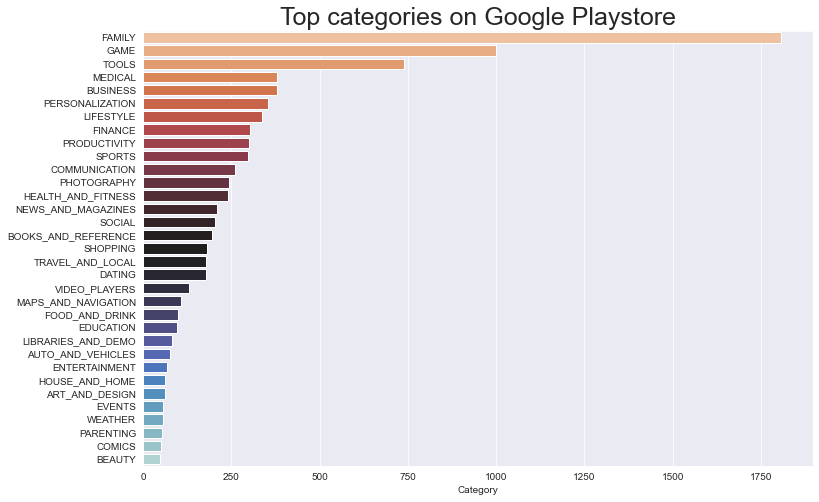

In [54]:
graph = sns.barplot(x, y, palette= "icefire_r")
graph.set_title("Top categories on Google Playstore", fontsize = 25);

Top category apps available on playstore are 'Family' and 'Game'  and the least are 'Comics' and 'Beauty'.

#### Which category of Apps from the Content Rating column are found more on playstore?

In [55]:
playstore['Content_Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [56]:
playstore['Content_Rating'].value_counts()

Everyone           7195
Teen                951
Mature 17+          368
Everyone 10+        313
Adults only 18+       2
Unrated               2
Name: Content_Rating, dtype: int64

In [57]:
x2 = playstore['Content_Rating'].value_counts().index
y2 = playstore['Content_Rating'].value_counts()

<AxesSubplot:ylabel='Content_Rating'>

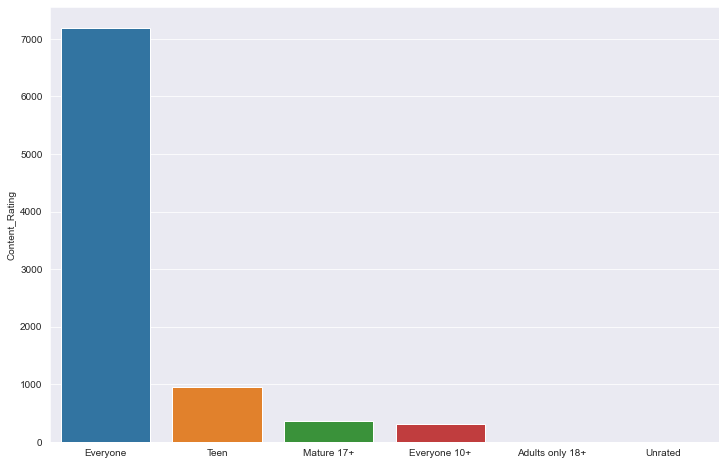

In [58]:
sns.barplot(x2,y2)

Everyone Category based apps are found more on the playstore.

### Distribution of the Rating column in dataframe.

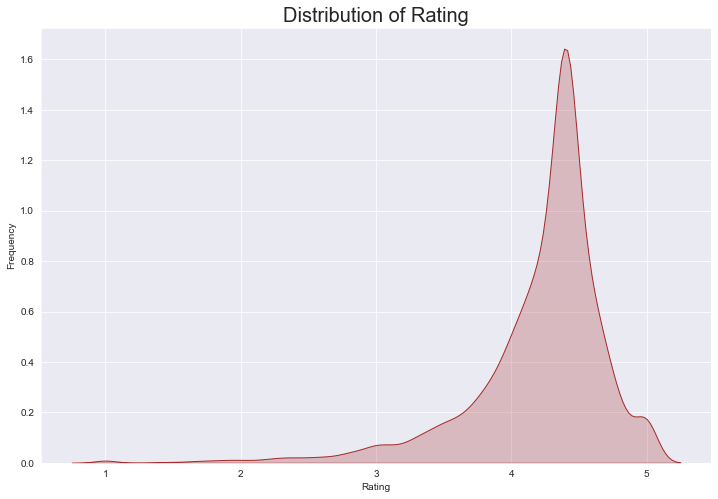

In [59]:
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(playstore.Rating,color="Brown", shade = True)
graph.set_title('Distribution of Rating',size = 20);

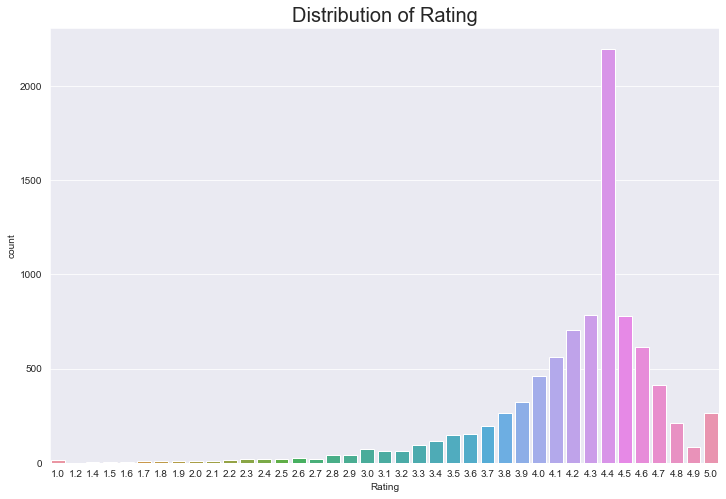

In [60]:
graph = sns.countplot(playstore.Rating)
graph.set_title('Distribution of Rating',size = 20);

Rating with 4.4 has the highest number of count and the distribution is left skewed and not normally distributed and most apps are rated in between 3.5 to 4.8

### Let's plot a visualization graph to view what portion of the apps in playstore are paid and free.

In [61]:
playstore.Type.value_counts()

Free    8140
Paid     691
Name: Type, dtype: int64

In [62]:
x3 = playstore['Type'].value_counts().index
y3 = playstore['Type'].value_counts()

<AxesSubplot:ylabel='Type'>

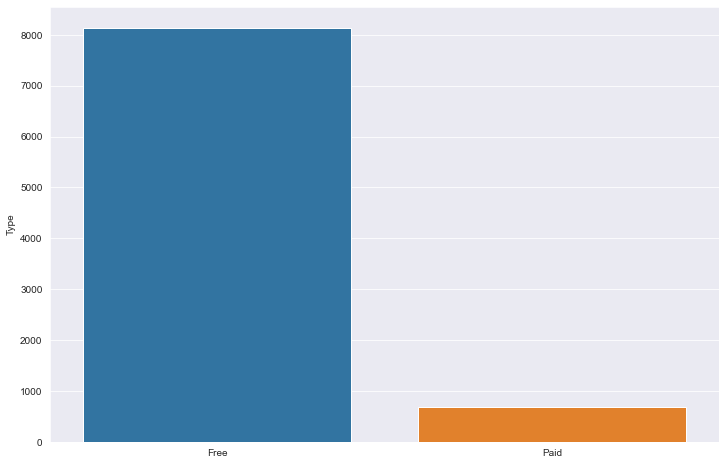

In [63]:
sns.barplot(x=x3,y=y3,data=playstore)

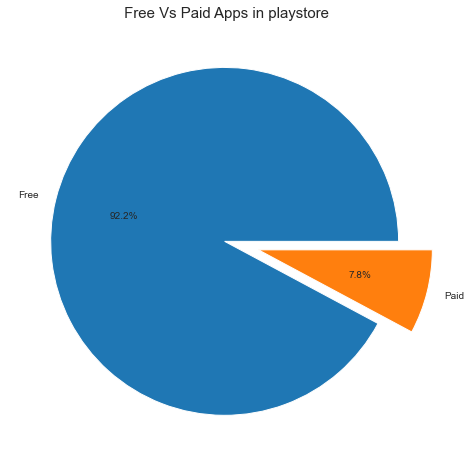

In [64]:
plt.pie(y3,labels=x3, autopct='%1.1f%%',explode=(0,0.2))
plt.title(' Free Vs Paid Apps in playstore',size = 15);

From these graph it is clear that '92% apps are Free and only 8% are Paid' apps in the playstore.

### Which category App’s have the most number of installs?

In [65]:
playstore.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600000.0,50000,Free,0.0,Everyone,Art & Design
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000000.0,50000,Free,0.0,Everyone,Art & Design
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000000.0,1000000,Free,0.0,Everyone,Art & Design
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000000.0,1000000,Free,0.0,Everyone,Art & Design
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100000.0,10000,Free,0.0,Everyone,Art & Design;Creativity


In [66]:
new=playstore.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)

In [67]:
new

,Installs
Category,
GAME,26802564253
FAMILY,6697222425
TOOLS,3527094815
COMMUNICATION,3336943051
NEWS_AND_MAGAZINES,3215005650
PRODUCTIVITY,2711312744
PHOTOGRAPHY,2390897655
SHOPPING,1312748785
SPORTS,1062449498


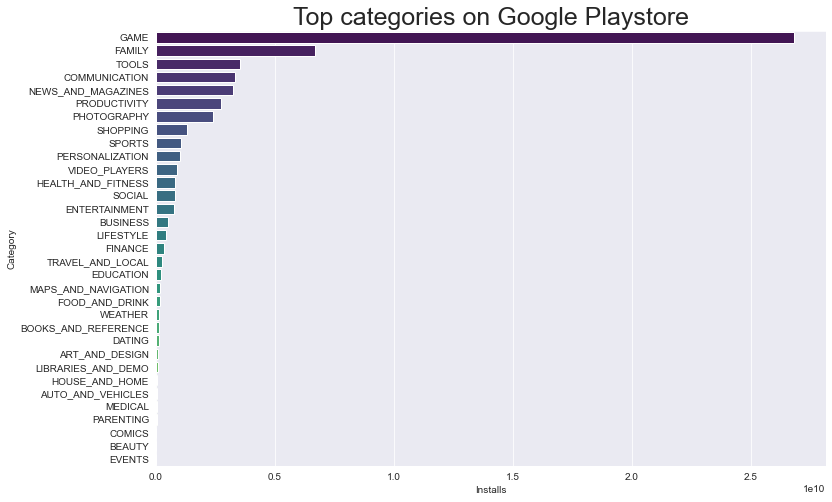

In [68]:
graph = sns.barplot(x='Installs', y=new.index, data=new, palette= "viridis")
graph.set_title("Top categories on Google Playstore", fontsize = 25);

from the figure it is evident that 'Game' and 'Family' has the most number of Installs

### What are the Top 10 installed apps in different category?

In [69]:
def top10category(str):
    str = str.upper()
    top10 = playstore[playstore['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(20)
    plt.title('Top 10 Installed Apps',size = 20);    
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs)
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 30, horizontalalignment='right')

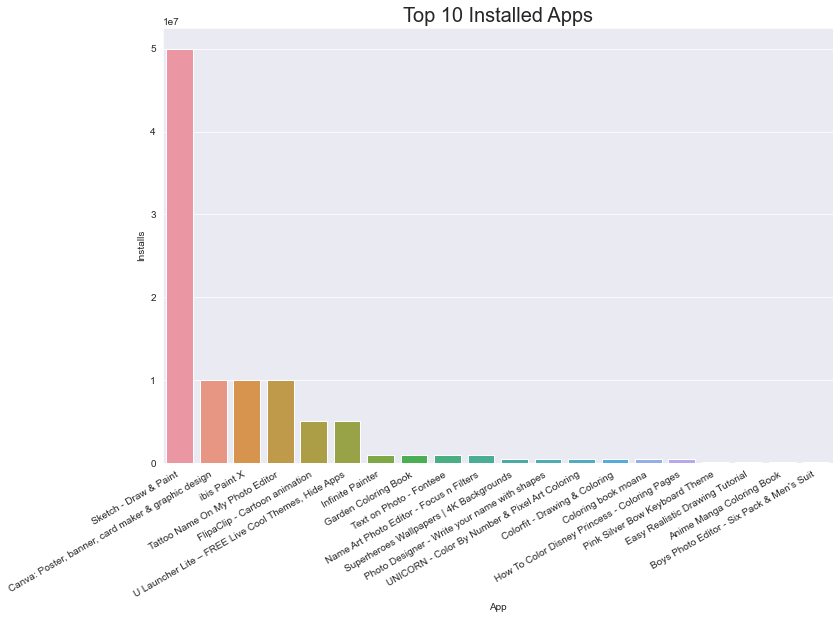

In [70]:
top10category('ART_AND_DESIGN')

### Which are the Apps with highest number of reviews?

In [71]:
data2=playstore.sort_values(by='Reviews', ascending=False).head(50)

In [72]:
data2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres
1879,Clash of Clans,GAME,4.6,44893888,98000000.0,100000000,Free,0.0,Everyone 10+,Strategy
1670,Clash of Clans,GAME,4.6,44891723,98000000.0,100000000,Free,0.0,Everyone 10+,Strategy
3986,Clash of Clans,FAMILY,4.6,44881447,98000000.0,100000000,Free,0.0,Everyone 10+,Strategy
1872,Subway Surfers,GAME,4.5,27725352,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade
1750,Subway Surfers,GAME,4.5,27724094,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade


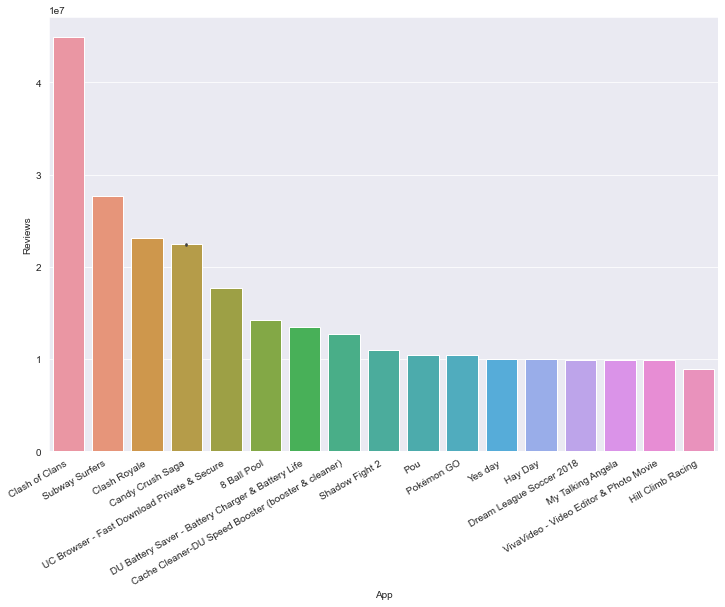

In [73]:
graph=sns.barplot(x='App',y='Reviews',data=data2);
graph.set_xticklabels(graph.get_xticklabels(), rotation= 30, horizontalalignment='right');

###  What are the count of Apps in different genres?

In [74]:
playstore.Genres.value_counts()

Tools                                739
Entertainment                        517
Education                            483
Medical                              380
Business                             379
                                    ... 
Parenting;Brain Games                  1
Travel & Local;Action & Adventure      1
Arcade;Pretend Play                    1
Casual;Music & Video                   1
Lifestyle;Pretend Play                 1
Name: Genres, Length: 116, dtype: int64

In [75]:
data3=playstore.groupby(by='Genres')[['App']].count().head()
data3

,App
Genres,
Action,323
Action;Action & Adventure,14
Adventure,69
Adventure;Action & Adventure,13
Adventure;Brain Games,1


In [76]:
data3.sort_values('App',ascending=False)

,App
Genres,
Action,323
Adventure,69
Action;Action & Adventure,14
Adventure;Action & Adventure,13
Adventure;Brain Games,1


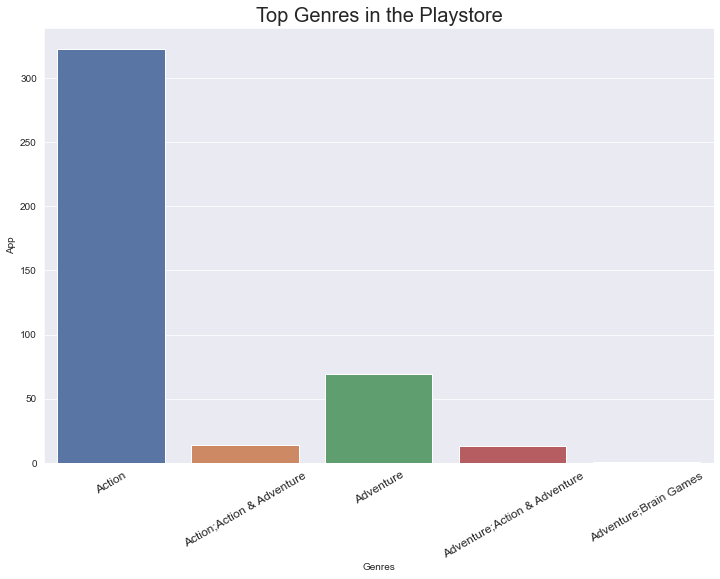

In [77]:
graph = sns.barplot(x=data3.index,y=data3['App'],palette="deep")
graph.set_xticklabels(graph.get_xticklabels(), rotation=30, fontsize=12)
graph.set_title("Top Genres in the Playstore", fontsize = 20);

### Which are the apps that have made the highest-earning?

In [78]:
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity


In [79]:
playstore['Earning']=playstore['Installs'] * playstore['Price']

In [80]:
data4=playstore.sort_values(by='Earning',ascending=False).head(10)
data4

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Earning
5351,I am rich,LIFESTYLE,3.8,3547,1800000.0,100000,Paid,399.99,Everyone,Lifestyle,39999000.0
5356,I Am Rich Premium,FINANCE,4.1,1867,4700000.0,50000,Paid,399.99,Everyone,Finance,19999500.0
4034,Hitman Sniper,GAME,4.6,408292,29000000.0,10000000,Paid,0.99,Mature 17+,Action,9900000.0
7417,Grand Theft Auto: San Andreas,GAME,4.4,348962,26000000.0,1000000,Paid,6.99,Mature 17+,Action,6990000.0
5578,Sleep as Android Unlock,LIFESTYLE,4.5,23966,872000.0,1000000,Paid,5.99,Everyone,Lifestyle,5990000.0
2883,Facetune - For Free,PHOTOGRAPHY,4.4,49553,48000000.0,1000000,Paid,5.99,Everyone,Photography,5990000.0
8804,DraStic DS Emulator,GAME,4.6,87766,12000000.0,1000000,Paid,4.99,Everyone,Action,4990000.0
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,10000,Paid,400.00,Everyone,Lifestyle,4000000.0
5354,I am Rich Plus,FAMILY,4.0,856,8700000.0,10000,Paid,399.99,Everyone,Entertainment,3999900.0
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000000.0,10000,Paid,399.99,Everyone,Lifestyle,3999900.0


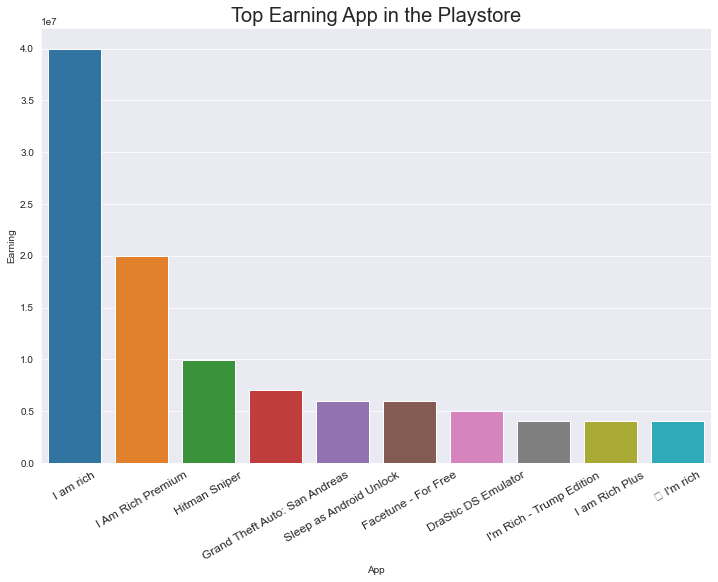

In [81]:
graph=sns.barplot(x=data4.App,y=data4.Earning);
graph.set_xticklabels(graph.get_xticklabels(), rotation=30, fontsize=12)
graph.set_title("Top Earning App in the Playstore", fontsize = 20);

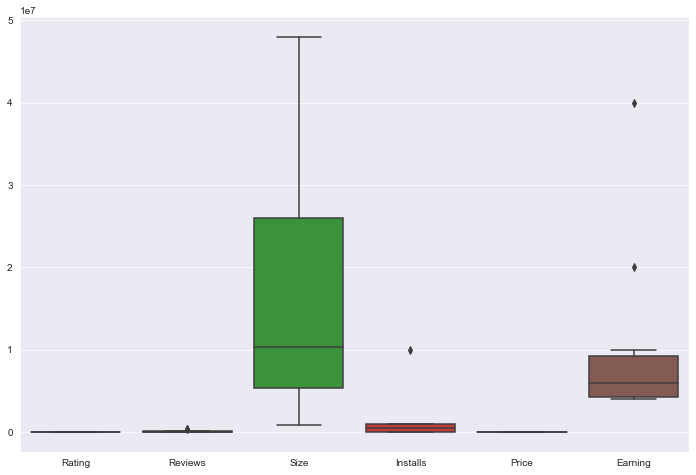

In [82]:
sns.boxplot(data=data4);

In [83]:
playstore.drop(['Earning'],axis=1,inplace=True)

# Rating reviews dataset

In [84]:
user=pd.read_csv('googleplaystore_user_reviews.csv')
user

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [85]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [86]:
user.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [87]:
user[user.Sentiment_Polarity.isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [88]:
user.shape

(64295, 5)

In [89]:
user.dropna(subset=['Sentiment_Polarity'],inplace=True)

In [90]:
user.isnull().sum()

App                       0
Translated_Review         5
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [91]:
user[user.Translated_Review.isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
268,11st,NaN,Neutral,0.0,0.0
15048,Birds Sounds Ringtones & Wallpapers,NaN,Neutral,0.0,0.0
22092,Calorie Counter - MyFitnessPal,NaN,Neutral,0.0,0.0
31623,DC Comics,NaN,Neutral,0.0,0.0
52500,Garden Photo Frames - Garden Photo Editor,NaN,Neutral,0.0,0.0


In [92]:
user.dropna(inplace=True)

In [93]:
user

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


In [94]:
user.shape

(37427, 5)

In [95]:
user.drop_duplicates(inplace=True)

In [96]:
user.shape

(29692, 5)

In [97]:
user.Sentiment.unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [98]:
user.App.unique()

array(['10 Best Foods for You', '104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室',
       '11st', '1800 Contacts - Lens Store',
       '1LINE – One Line with One Touch',
       '2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif',
       '21-Day Meditation Experience',
       '2Date Dating App, Love and matching',
       '2GIS: directory & navigator', '2RedBeans',
       '2ndLine - Second Phone Number',
       '30 Day Fitness Challenge - Workout at Home',
       '365Scores - Live Scores', '3D Live Neon Weed Launcher',
       '4 in a Row', '4K Wallpapers and Ultra HD Backgrounds',
       '591房屋交易-租屋、中古屋、新建案、實價登錄、別墅透天、公寓套房、捷運、買房賣房行情、房價房貸查詢', '591房屋交易-香港',
       '7 Cups: Anxiety & Stress Chat', '7 Day Food Journal Challenge',
       '7 Minute Workout', '7 Weeks - Habit & Goal Tracker',
       '8 Ball Pool', '850 Sports News Digest',
       '8fit Workouts & Meal Planner', '95Live -SG#1 Live Streaming App',
       'A Call From Santa Claus!', 'A Word A Day',
       'A&E - Watch Full Episodes of TV Shows',
 

In [99]:
user['Translated_Review'].unique()

array(['I like eat delicious food. That\'s I\'m cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"',
       'This help eating healthy exercise regular basis',
       'Works great especially going grocery store', ...,
       'Dumb app, I wanted post property rent give option. Website work. Waste time space phone.',
       'I property business got link SMS happy performance still guys need raise bar guys Cheers',
       'Useless app, I searched flats kondapur, Hyderabad . None number reachable I know flats unavailable would keep posts active'],
      dtype=object)

In [100]:
user =  user[user['App'].str.contains('[A-Z,a-z]')]

In [101]:
user

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


In [102]:
print(pg.normality(user['Sentiment_Polarity']))
print('''
''')
print(pg.normality(user['Sentiment_Subjectivity']))

                           W  pval  normal
Sentiment_Polarity  0.979006   0.0   False


                               W  pval  normal
Sentiment_Subjectivity  0.952677   0.0   False


In [103]:
data5=user[['Sentiment_Polarity','Sentiment_Subjectivity']]

<AxesSubplot:>

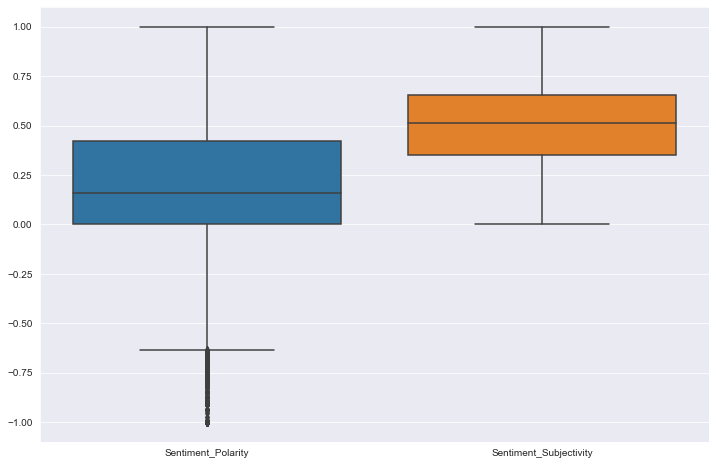

In [104]:
sns.boxplot(data=data5)

In [105]:
!pip install wordcloud

In [106]:
#importing wordcloud and stopwords, stopwords are generally common words in a sentence which can effect our analysis
#so this function removes them by using set(stopwords)

from wordcloud import WordCloud,STOPWORDS 

In [107]:
stopwords=set(STOPWORDS)

In [108]:
#stopwords

In [109]:
user

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


### Negative reviews for different Apps on wordcloud

In [110]:
NegRevw=user[(user['Sentiment']=='Negative') & (user['Sentiment_Polarity']<0)]
NegRevw

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500000,0.500000
43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200000,0.000000
68,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200000,0.000000
85,10 Best Foods for You,Crap Doesn't work,Negative,-0.800000,0.800000
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325000,0.475000
...,...,...,...,...,...
64215,Housing-Real Estate & Property,Horrible app. I wanted list property get aroun...,Negative,-0.528571,0.717262
64216,Housing-Real Estate & Property,Worst app. We get nothing Time waste . They up...,Negative,-0.400000,0.250000
64220,Housing-Real Estate & Property,"No response support team. After I login, unabl...",Negative,-0.377778,0.533333
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000


In [111]:
total_Ntexts=' '.join(NegRevw['Translated_Review'])

In [112]:
#total_Ntexts

In [113]:
wordcloud=WordCloud(width=1500,height=750,stopwords=stopwords).generate(total_Ntexts)

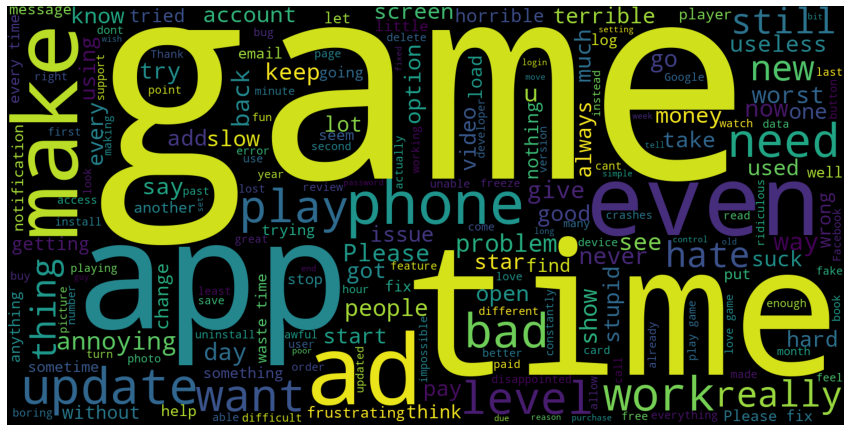

In [114]:
#next we plot the wordcloud of Negative comment formed above using matplotlib and put the axis off to get only the words

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off');

### Positive reviews from customers for different apps on wordcloud

In [115]:
PosRevw=user[(user['Sentiment']=='Positive') & (user['Sentiment_Polarity']>0)]
PosRevw

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64217,Housing-Real Estate & Property,"I able set range 1cr, scroll space 0-1cr range...",Positive,0.233333,0.550000
64221,Housing-Real Estate & Property,Everything old stuff neither clear sold proper...,Positive,0.021591,0.259470
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222


In [116]:
total_Ptexts=' '.join(PosRevw['Translated_Review'])

In [117]:
#total_Ptexts

In [118]:
wordcloud=WordCloud(width=1500,height=750,stopwords=stopwords).generate(total_Ptexts)

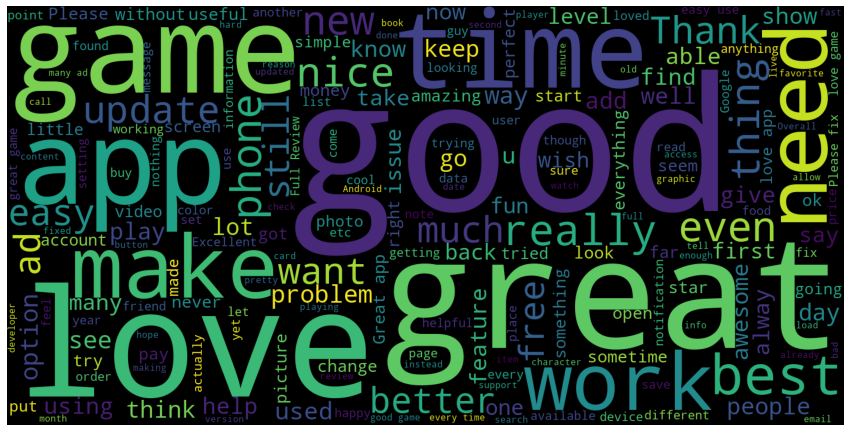

In [119]:
#next we plot the wordcloud of positive comment formed above using matplotlib and put the axis off to get only the words

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off');

### Neutral reviews on different Apps on wordcloud

In [120]:
Neutral=user[(user['Sentiment']=='Neutral')]
Neutral

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
8,10 Best Foods for You,"Looking forward app,",Neutral,0.0,0.0
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.0,0.0
22,10 Best Foods for You,God health,Neutral,0.0,0.0
25,10 Best Foods for You,I found lot wealth form health...,Neutral,0.0,0.0
29,10 Best Foods for You,On test....,Neutral,0.0,0.0
...,...,...,...,...,...
64189,Hotwire Hotel & Car Rental App,Solid app. No issues yet. Been using year.,Neutral,0.0,0.1
64194,Hotwire Hotel & Car Rental App,"Keeps telling there's problem date time, can't...",Neutral,0.0,0.0
64200,Housing-Real Estate & Property,Why business? Your filters don't work.. redire...,Neutral,0.0,0.0
64205,Housing-Real Estate & Property,I want list property sale option. Please connect,Neutral,0.0,0.0


In [121]:
total_Neutral=' '.join(Neutral['Translated_Review'])

In [122]:
wordcloud=WordCloud(width=1500,height=750,stopwords=stopwords).generate(total_Neutral)

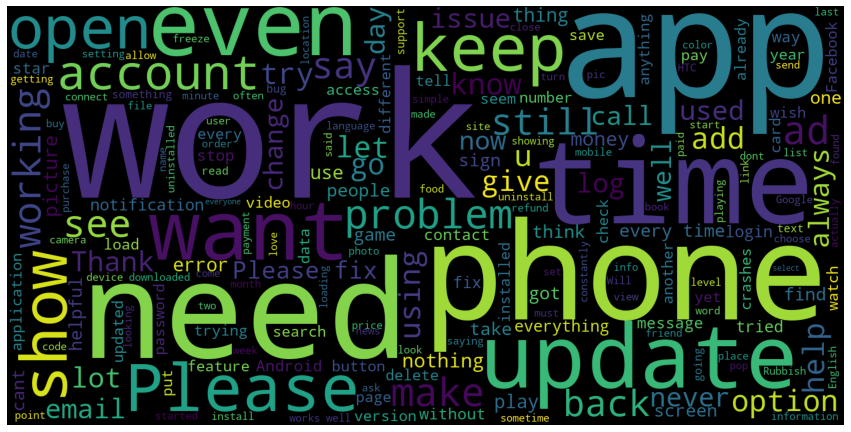

In [123]:
#next we plot the wordcloud of Neutral comment formed above using matplotlib and put the axis off to get only the words

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off');

In [124]:
import os
os.chdir(r'D:\visualization')

In [125]:
from PIL import Image

In [126]:
mask=np.array(Image.open('app.jpg'))

In [127]:
wordcloud=WordCloud(width=1500,height=750,stopwords=stopwords,mask=mask,background_color='white').generate(total_Neutral)

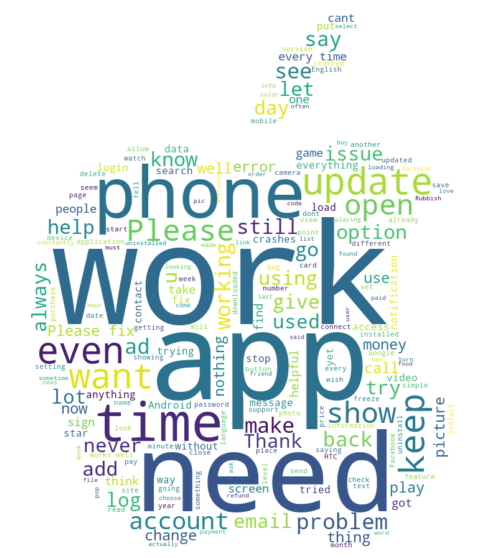

In [128]:
#next we plot the wordcloud of Neutral comment formed above using matplotlib and put the axis off to get only the words

plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off');

In [129]:
label=['Positive','Negative','Neutral']

In [130]:
size=[PosRevw.shape[0],NegRevw.shape[0],Neutral.shape[0]]

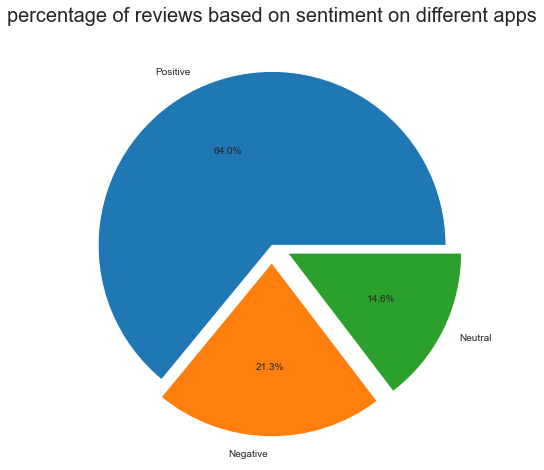

In [131]:
plt.pie(size,labels=label,autopct='%1.1f%%',explode=(0,0.1,0.1));
plt.title('percentage of reviews based on sentiment on different apps',size=20);

### which app has highest  polarity.

In [132]:
user.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [133]:
avg_polarity=user.groupby(by='App').mean()

In [134]:
avg_polarity

,Sentiment_Polarity,Sentiment_Subjectivity
App,,
10 Best Foods for You,0.465906,0.493254
11st,0.185943,0.455340
1800 Contacts - Lens Store,0.318145,0.591098
1LINE – One Line with One Touch,0.196290,0.557315
2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,0.423659,0.512356
...,...,...
Hotels.com: Book Hotel Rooms & Find Vacation Deals,0.098559,0.525508
Hotspot Shield Free VPN Proxy & Wi-Fi Security,0.223750,0.380365
Hotstar,0.038178,0.493964


In [135]:
Top_rating=avg_polarity.sort_values(by='Sentiment_Polarity',ascending=False).head(10)

In [136]:
Top_rating

,Sentiment_Polarity,Sentiment_Subjectivity
App,,
HomeWork,1.000000,0.300000
Google Slides,0.933333,0.916667
Daily Workouts - Exercise Fitness Routine Trainer,0.800000,0.750000
Bed Time Fan - White Noise Sleep Sounds,0.781250,0.600000
Cameringo Lite. Filters Camera,0.770269,0.533333
Google Primer,0.750000,0.675000
GPS Map Free,0.700000,0.600000
GPS Speedometer and Odometer,0.650000,0.622222
Best Ovulation Tracker Fertility Calendar App Glow,0.595313,0.541667


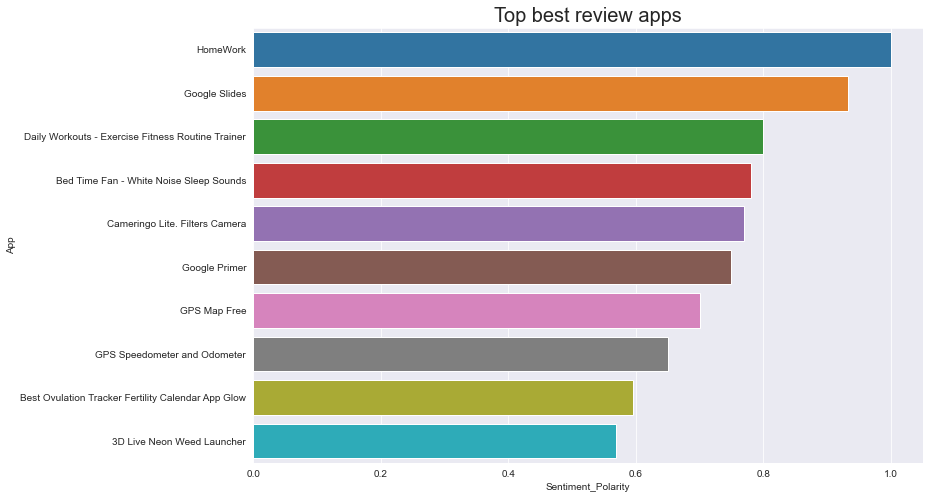

In [137]:
graph=sns.barplot(y=Top_rating.index,x='Sentiment_Polarity',data=Top_rating);
plt.title('Top best review apps',size=20);

In [138]:
Top_rating1=avg_polarity.sort_values(by='Sentiment_Subjectivity',ascending=False).head(10)

In [139]:
Top_rating1

,Sentiment_Polarity,Sentiment_Subjectivity
App,,
Google Slides,0.933333,0.916667
Daily Workouts - Exercise Fitness Routine Trainer,0.800000,0.750000
Choice Hotels,0.298790,0.719206
HTC Calendar,-0.037626,0.694949
Hitwe - meet people and chat,-0.139456,0.694105
850 Sports News Digest,0.542860,0.692420
Google Street View,-0.500000,0.691667
"CM Browser - Ad Blocker , Fast Download , Privacy",0.012500,0.687500
Draw Your Game,-0.668490,0.683333


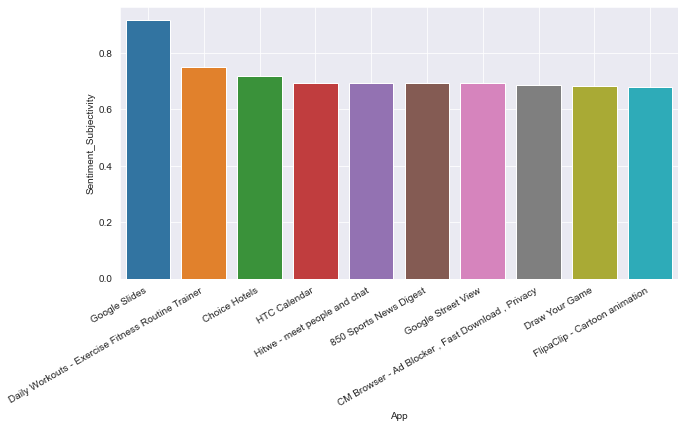

In [140]:
plt.figure(figsize = (10,5))
graph=sns.barplot(x=Top_rating1.index,y='Sentiment_Subjectivity',data=Top_rating1);
graph.set_xticklabels(graph.get_xticklabels(), rotation= 30, horizontalalignment='right');
plt.grid(True)

In [141]:
print('user:',user.shape)
print('playstore:',playstore.shape)

user: (29632, 5)
playstore: (8831, 10)


### merging out the two dataset using the common column which is app

In [142]:
df=pd.merge(playstore,user,on='App')

In [143]:
df.head(12)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,It bad >:(,Negative,-0.725000,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,like,Neutral,0.000000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,I love colors inspyering,Positive,0.500000,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,I hate,Negative,-0.800000,0.900000
5,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,omgggggg,Neutral,0.000000,0.000000
6,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,It cute.,Positive,0.500000,1.000000
7,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,I love,Positive,0.500000,0.600000
8,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,Love,Positive,0.500000,0.600000
9,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,I love enjoyable fun,Positive,0.433333,0.466667


In [144]:
df.duplicated().value_counts()

False    26523
dtype: int64

In [145]:
df.drop(['Translated_Review'],axis=1,inplace=True)

In [146]:
df[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
5,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,Neutral,0.0,0.0
7,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,Positive,0.5,0.6
8,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,Positive,0.5,0.6
16,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,Positive,0.5,0.5
17,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,Negative,-0.8,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26431,Diary with lock password,LIFESTYLE,4.3,179139,9700000.0,5000000,Free,0.0,Everyone,Lifestyle,Neutral,0.0,0.0
26445,Diary with lock password,LIFESTYLE,4.3,179139,9700000.0,5000000,Free,0.0,Everyone,Lifestyle,Neutral,0.0,0.0
26449,Diary with lock password,LIFESTYLE,4.3,179139,9700000.0,5000000,Free,0.0,Everyone,Lifestyle,Positive,0.5,0.6
26450,Diary with lock password,LIFESTYLE,4.3,179139,9700000.0,5000000,Free,0.0,Everyone,Lifestyle,Neutral,0.0,0.0


In [147]:
df.drop_duplicates(inplace=True)

In [148]:
df.shape

(23020, 13)

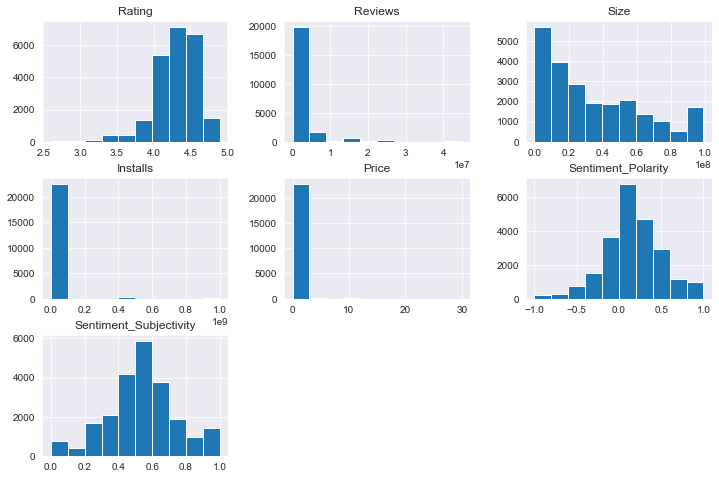

In [149]:
df.hist();

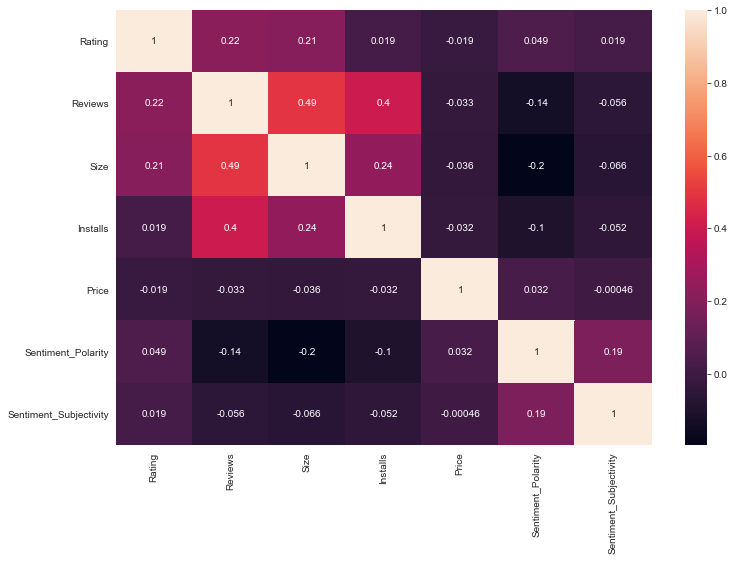

In [150]:
sns.heatmap(df.corr(),annot=True);

### average polarity vs category

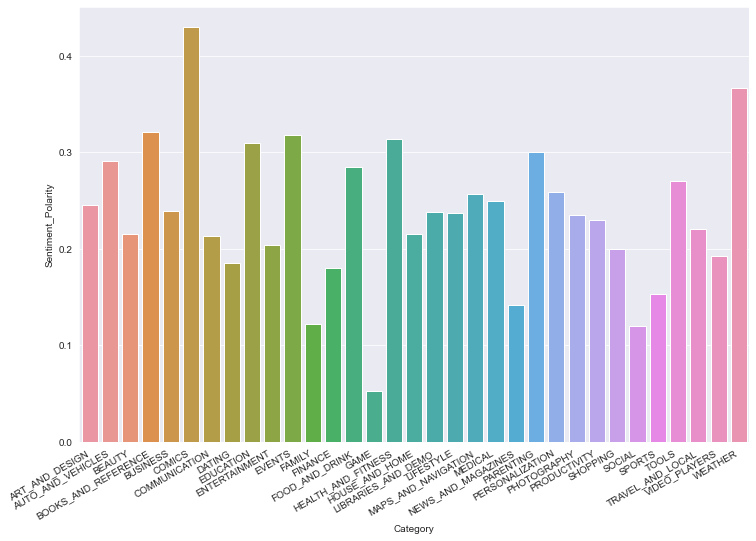

In [151]:
#average polarity vs category
graph = sns.barplot(x=df.groupby('Category').mean().index, y = 'Sentiment_Polarity', data = df.groupby('Category').mean())
graph.set_xticklabels(graph.get_xticklabels(), rotation= 30, horizontalalignment='right');

### Which 3 category of apps can be removed considering the reviews, Installs and profit are comparatively very low?

In [152]:
df1=df[df['Type']=='Paid']

In [153]:
df1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
14870,Farming Simulator 18,GAME,4.5,18125,15000000.0,100000,Paid,4.99,Everyone,Simulation;Education,Negative,-0.209091,0.631818
14871,Farming Simulator 18,GAME,4.5,18125,15000000.0,100000,Paid,4.99,Everyone,Simulation;Education,Positive,0.552000,0.586000
14872,Farming Simulator 18,GAME,4.5,18125,15000000.0,100000,Paid,4.99,Everyone,Simulation;Education,Positive,0.215238,0.451429
14873,Farming Simulator 18,GAME,4.5,18125,15000000.0,100000,Paid,4.99,Everyone,Simulation;Education,Negative,-0.094805,0.350649
14874,Farming Simulator 18,GAME,4.5,18125,15000000.0,100000,Paid,4.99,Everyone,Simulation;Education,Positive,0.300000,0.510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23666,BIG Launcher,PERSONALIZATION,4.3,881,5900000.0,10000,Paid,9.99,Everyone,Personalization,Positive,0.600000,0.700000
23667,BIG Launcher,PERSONALIZATION,4.3,881,5900000.0,10000,Paid,9.99,Everyone,Personalization,Positive,0.811111,0.944444
23668,BIG Launcher,PERSONALIZATION,4.3,881,5900000.0,10000,Paid,9.99,Everyone,Personalization,Positive,0.250000,0.478571
23669,BIG Launcher,PERSONALIZATION,4.3,881,5900000.0,10000,Paid,9.99,Everyone,Personalization,Positive,0.016667,0.316667


In [154]:
df1.groupby('Category').mean()

,Rating,Reviews,Size,Installs,Price,Sentiment_Polarity,Sentiment_Subjectivity
Category,,,,,,,
FAMILY,4.400000,3396.500000,9.500000e+06,50000.000000,3.990000,0.184956,0.558124
GAME,4.478049,17750.292683,1.726829e+07,100000.000000,5.136341,0.045801,0.489464
MEDICAL,4.336842,993.947368,3.110526e+07,26789.473684,11.042632,0.295722,0.551664
PERSONALIZATION,4.271970,55190.636364,1.761136e+07,752500.000000,3.660455,0.191747,0.506237
SPORTS,4.100000,3387.000000,2.500000e+07,50000.000000,29.990000,0.413551,0.544317


In [155]:
df1['Profit']= df1['Installs'] * df1['Price']

In [156]:
df1.shape

(350, 14)

In [157]:
df1.Category.unique()

array(['GAME', 'FAMILY', 'MEDICAL', 'SPORTS', 'PERSONALIZATION'],
      dtype=object)

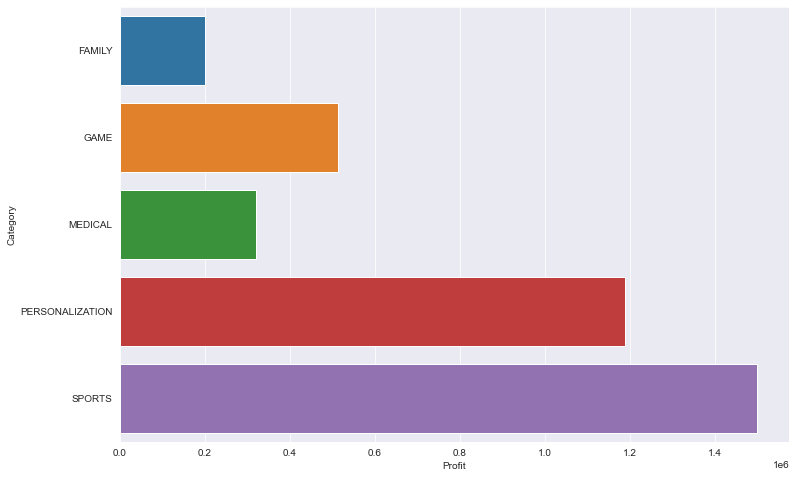

In [158]:
sns.barplot(y=df1.groupby('Category').mean().index, x = 'Profit', data =df1.groupby('Category').mean());

In [159]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,Negative,-0.800,0.900000


#Which type of apps have higher sentiment polarity 
#visualize the relation between content rating and sentiment polarity
#which types of apps have higher installs
#which category of apps have higher installs
#relation between rating and  content rating

playstore app and user app are same or not?